# Classification problem: Heart Disease Diagnosis
In this notebook I have a heart disease csv file containing measured values necessary for diagnosing heart disease. The dataset includes patients with and without heart disease. My goal is to train a maschine learning classification model to diagnose patients based on the provided data.

## Part 1: Setting up data and model 

First, I import the required libraries from pandas, numpy and sklearn. Then, I split the data to training and testing sets. The training and testing sets are further divided into measured data (X_train, X_test) and the corresponding results (y_train, y_test). The testing set, comprising measured data (X_test, y_test), represents 20% of all provided measurements.

In [27]:
# Importing pandas and numpy libraries 
# along with heart-disease data 
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")

# Displaying the data
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [28]:
# Splitting the data to X and y
# X being measured data and y the result od the measured data

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [29]:
# Importing RandomForesClassifier 
# along with train_test_split for dividing the data
# to train/test sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Deviding the data to train/test ,,setst,, 
# train data = 80% of heart_disease data, test data = 20% of heart_disease data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Defining Random Forest Classifier
clf = RandomForestClassifier()

In [30]:
# Getting the params of choosen model
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Part 2: Fitting and checking the training and testing data

In this part I'll be fitting the training data to the model, meaning I'll provide model with measured data with corresponding results but only from training sets. After fitting the training data I'll test the accuracy of selected model to check if choosing Random Forest Classifier was a good choice. 

Then I'll provide model with measured data from testing set `X_test` without showing the results `y_test`. This result will be stored as `y_preds` which I'll be using to measure models' performance. Results of these measures will be useful in process of tuning the model.

In [31]:
# Training the model on training data 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Checking model's accuracy on training data
clf.score(X_test,y_test)

0.8524590163934426

In [33]:
# Making prediction on a testing data 
# note: without showing model `y_test` i.e. results
y_preds = clf.predict(X_test)

In [34]:
# Visually checking the results of y_preds
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [35]:
# Scoring the model on testing results
# i.e. comparing how model performed on predicting the data 
# without seeing the actual results
clf.score(X_test, y_test)

0.8524590163934426

In [36]:
# Importing additional metrics for tuning model's results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
# Checking model's performance on selected values
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [41]:
# Importing Confusion matrix
from sklearn.metrics import confusion_matrix

# Making Predictions on with testing data
y_preds = clf.predict(X_test)

# Comparing predictet values with truth results
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [42]:
# Visualizing confusion matrix on testing data
pd.crosstab(y_test, y_preds, rownames=["Actual Label"],
           colnames=["Predicted labels"])


Predicted labels,0,1
Actual Label,,
0,24,5
1,4,28


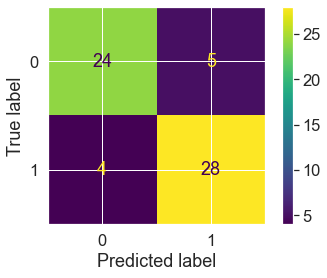

In [44]:
# Importing Confusion Matrix from SKlearn 
# to make visualization prettier
from sklearn.metrics import ConfusionMatrixDisplay

# Displaying Confusion Matrix made from testing set
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

# Making prediction using cross validation

In this section of the notebook, I will demonstrate the cross-validation method using our heart disease dataset. One significant advantage of this method is that cross_val_score creates 5 shuffled copies of our data. Each of these copies is then split into training and testing sets, allowing our chosen model to be trained on each subset. The key benefit of this approach is increased confidence in the model's precision, as it undergoes training and testing on multiple variations of the data.

In [46]:
# Importin cross_val_score 
from sklearn.model_selection import cross_val_score

# Setting the random seed for reproducible results
np.random.seed(42)

# Initiliazing cross val score with precision as a scoring parameter
cv_precision = cross_val_score(clf, X, y, scoring="precision")

In [48]:
# Getting average precision value
cv_precision.mean()

0.8329547346025924

In [49]:
# Displaying all results from cross val score
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [50]:
### Making cross val score but now with recall as a scoring parameter
# Setting the random seed for reproducible results
np.random.seed(42)

# Initiliazing cross val score
cv_recall = cross_val_score(clf, X, y, scoring="recall")

In [52]:
# Displaying all results from cross val score
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [53]:
# Getting average recall value
cv_recall.mean()

0.8545454545454545

In [54]:
# Saving our model

import pickle 

pickle.dump(clf, open("trained_clf_model.pkl","wb"))